# Install packages

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 12.3 MB/s eta 0:00:00


# Import Libraries

In [ ]:
from ultralytics import YOLO
import os
import cv2
import datetime
from google.colab import drive
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Mount Google Drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load the YOLO model

In [ ]:
license_plate_detector = YOLO('/content/gdrive/My Drive/SLP-split/models/license_plate_detector.pt')

In [ ]:
folder_path = '/content/gdrive/My Drive/SLP-split/images/dataset/Rawan'

# Loop through all files in the folder
i = 0
j = 0
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for valid image extensions

        file_path = os.path.join(folder_path, filename)
        print(f'{i}, {j}', {filename})
        j += 1
    i += 1

0, 0 {'473762370_122214586796036801_7838300241464732369_n.jpg'}
1, 1 {'474073017_572766292326620_8725208007426030458_n.jpg'}
2, 2 {'474090313_122136103052480961_6258597887481453274_n.jpg'}
3, 3 {'474089132_3317811528354056_4971536142873559844_n.jpg'}
4, 4 {'474071401_1152860219809468_1747403977342017913_n.jpg'}
5, 5 {'474096432_949865190459049_8494298267667639165_n.jpg'}
6, 6 {'473740594_122182690658252465_2876286384272544741_n.jpg'}
7, 7 {'473681400_585066084372085_6719236388230854317_n.jpg'}
8, 8 {'473697945_2340416359658566_2635985091888559405_n.jpg'}
9, 9 {'473672075_8992968344156508_8816059635079315451_n.jpg'}
10, 10 {'473778150_3469007540073894_6011230610484261898_n.jpg'}
11, 11 {'473794427_468168019674428_3065432518603058208_n.jpg'}
12, 12 {'473790685_3315840565217819_4565465585999737522_n.jpg'}
13, 13 {'473800348_605512958901996_1034970856523792578_n.jpg'}
14, 14 {'473801336_589971637216328_4406521384083023824_n.jpg'}
15, 15 {'473808115_2340415692991966_1396817012594670946_n.jp

In [ ]:
# Specify the folder containing images
folder_path = '/content/gdrive/My Drive/SLP-split/images/dataset/Rawan'


# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for valid image extensions
        file_path = os.path.join(folder_path, filename)

        # Read the image using cv2
        image = cv2.imread(file_path)

        # Convert the image to RGB (for displaying with matplotlib)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Detect license plates
        license_plates = license_plate_detector(image)[0]

        for license_plate in license_plates.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = license_plate

            # Time determination
            time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

            # License plate cropping
            license_plate_crop = image[int(y1):int(y2), int(x1):int(x2), :]

            # Convert the cropped license plate to RGB
            license_plate_rgb = cv2.cvtColor(license_plate_crop, cv2.COLOR_BGR2RGB)

            pil_img = Image.fromarray(license_plate_rgb)

            # Save cropped license plate image
            save_path = f'/content/gdrive/My Drive/SLP-split/images/cropped/image_cropped_in_{time}.jpg'
            try:
                pil_img.save(save_path)
                print(f'Saved: {save_path}')
            except Exception as e:
                print(f'Error while saving {save_path}: {e}')


0: 384x640 2 License_Plates, 216.3ms
Speed: 4.7ms preprocess, 216.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Saved: /content/gdrive/My Drive/SLP-split/images/cropped/image_cropped_in_2025_01_21_08_25_59.jpg
Saved: /content/gdrive/My Drive/SLP-split/images/cropped/image_cropped_in_2025_01_21_08_25_59.jpg

0: 640x512 1 License_Plate, 532.5ms
Speed: 6.0ms preprocess, 532.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)
Saved: /content/gdrive/My Drive/SLP-split/images/cropped/image_cropped_in_2025_01_21_08_26_00.jpg

0: 640x480 1 License_Plate, 219.4ms
Speed: 5.3ms preprocess, 219.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Saved: /content/gdrive/My Drive/SLP-split/images/cropped/image_cropped_in_2025_01_21_08_26_00.jpg

0: 640x480 1 License_Plate, 161.9ms
Speed: 5.4ms preprocess, 161.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Saved: /content/gdrive/My Drive/SLP-split/images/cropped/image_crop

Saving IMG-20250125-WA0006.jpg to IMG-20250125-WA0006.jpg

0: 480x640 1 License_Plate, 247.7ms
Speed: 5.7ms preprocess, 247.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


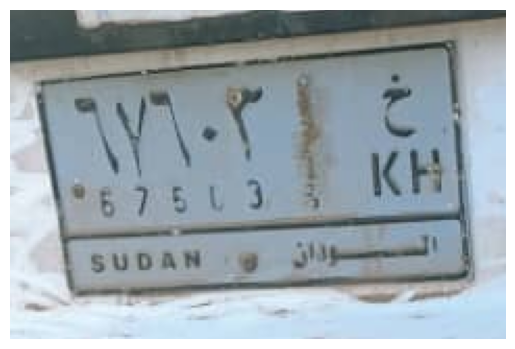

In [ ]:
# Upload the image
uploaded = files.upload()

# Extract the filename
filename = list(uploaded.keys())[0]

# Read the image using cv2
image = cv2.imread(filename)

# Convert the image to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


license_plates = license_plate_detector(image)[0]


for license_plate in license_plates.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = license_plate

  # Time determination
  time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

  # License plate cropping
  license_plate_crop = image[int(y1):int(y2), int(x1): int(x2), :]

  # Convert the image to RGB (for displaying with matplotlib)
  license_plate_rgb = cv2.cvtColor(license_plate_crop, cv2.COLOR_BGR2RGB)

  pil_img = Image.fromarray(license_plate_rgb)

  # Save cropped face image
  try:
          pil_img.save(f'/content/gdrive/My Drive/SLP-split/images/cropped/image cropped in {time}.jpg')
  except:
          print(f'Error while saving image cropped in {time}.jpg')

# Convert the image to RGB (for displaying with matplotlib)
license_plate_rgb = cv2.cvtColor(license_plate_crop, cv2.COLOR_BGR2RGB)

# Display the license_plate_crop
plt.imshow(license_plate_rgb)
plt.axis('off')
plt.show()

# Resize with aspect ratio

In [ ]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)